In [1]:
%reload_ext nb_black
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "useducation"

<IPython.core.display.Javascript object>

In [2]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

us_edu = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()


<IPython.core.display.Javascript object>

1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [3]:
us_edu.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


<IPython.core.display.Javascript object>

In [4]:
fill_list = [
    "ENROLL",
    "TOTAL_REVENUE",
    "FEDERAL_REVENUE",
    "STATE_REVENUE",
    "LOCAL_REVENUE",
    "TOTAL_EXPENDITURE",
    "INSTRUCTION_EXPENDITURE",
    "SUPPORT_SERVICES_EXPENDITURE",
    "OTHER_EXPENDITURE",
    "CAPITAL_OUTLAY_EXPENDITURE",
    "GRADES_PK_G",
    "GRADES_KG_G",
    "GRADES_4_G",
    "GRADES_8_G",
    "GRADES_12_G",
    "GRADES_1_8_G",
    "GRADES_9_12_G",
    "GRADES_ALL_G",
]

states = us_edu["STATE"].unique()

for state in states:
    us_edu.loc[us_edu["STATE"] == state, fill_list] = us_edu.loc[
        us_edu["STATE"] == state, fill_list
    ].interpolate()

# we drop the null values after interpolation


<IPython.core.display.Javascript object>

In [5]:
us_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1492 non-null   object 
 1   STATE                         1492 non-null   object 
 2   YEAR                          1492 non-null   int64  
 3   ENROLL                        1281 non-null   float64
 4   TOTAL_REVENUE                 1331 non-null   float64
 5   FEDERAL_REVENUE               1331 non-null   float64
 6   STATE_REVENUE                 1331 non-null   float64
 7   LOCAL_REVENUE                 1331 non-null   float64
 8   TOTAL_EXPENDITURE             1331 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1331 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1331 non-null   float64
 11  OTHER_EXPENDITURE             1281 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1331 non-null   float64
 13  GRA

<IPython.core.display.Javascript object>

In [6]:
# expenditure and rev by state, find mean
us_edu.agg({'TOTAL_REVENUE': ['mean'], 'TOTAL_EXPENDITURE': ['mean']})


,TOTAL_REVENUE,TOTAL_EXPENDITURE
mean,9.246804e+06,9.342417e+06


<IPython.core.display.Javascript object>

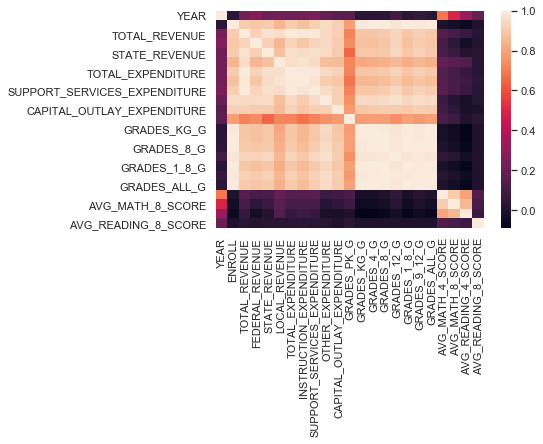

<IPython.core.display.Javascript object>

In [7]:
sns.heatmap(us_edu.corr())

2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

In [8]:
oh_df = us_edu[us_edu["STATE"] == "OHIO"]

<IPython.core.display.Javascript object>

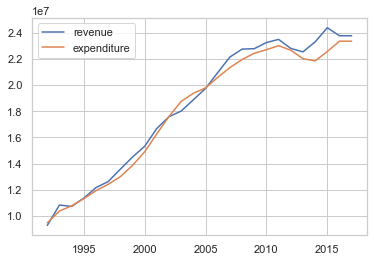

<IPython.core.display.Javascript object>

In [9]:
plt.plot(oh_df["YEAR"], oh_df[["TOTAL_REVENUE", "TOTAL_EXPENDITURE"]])
plt.legend(["revenue", "expenditure"])
plt.show()

3. In your chosen state, which of the lessons are the students more successful, math or reading?

In [10]:
oh_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 35 to 1482
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   26 non-null     object 
 1   STATE                         26 non-null     object 
 2   YEAR                          26 non-null     int64  
 3   ENROLL                        25 non-null     float64
 4   TOTAL_REVENUE                 26 non-null     float64
 5   FEDERAL_REVENUE               26 non-null     float64
 6   STATE_REVENUE                 26 non-null     float64
 7   LOCAL_REVENUE                 26 non-null     float64
 8   TOTAL_EXPENDITURE             26 non-null     float64
 9   INSTRUCTION_EXPENDITURE       26 non-null     float64
 10  SUPPORT_SERVICES_EXPENDITURE  26 non-null     float64
 11  OTHER_EXPENDITURE             25 non-null     float64
 12  CAPITAL_OUTLAY_EXPENDITURE    26 non-null     float64
 13  GRAD

<IPython.core.display.Javascript object>

In [28]:
oh_df["combined_math_linear"] = (
    oh_df["AVG_MATH_4_SCORE"].interpolate() + oh_df["AVG_MATH_8_SCORE"].interpolate()
)
oh_df["combined_reading_linear"] = (
    oh_df["AVG_READING_4_SCORE"].interpolate()
    + oh_df["AVG_READING_8_SCORE"].interpolate()
)

<IPython.core.display.Javascript object>

In [29]:
oh_df["combined_math_mean"] = oh_df["AVG_MATH_4_SCORE"].fillna(
    value=oh_df["AVG_MATH_4_SCORE"].mean()
) + oh_df["AVG_MATH_8_SCORE"].fillna(value=oh_df["AVG_MATH_8_SCORE"].mean())
oh_df["combined_reading_mean"] = oh_df["AVG_READING_4_SCORE"].fillna(
    value=oh_df["AVG_READING_4_SCORE"].mean()
) + oh_df["AVG_READING_8_SCORE"].fillna(value=oh_df["AVG_READING_8_SCORE"].mean())

<IPython.core.display.Javascript object>

In [30]:
oh_df["combined_math_median"] = oh_df["AVG_MATH_4_SCORE"].fillna(
    value=oh_df["AVG_MATH_4_SCORE"].median()
) + oh_df["AVG_MATH_8_SCORE"].fillna(value=oh_df["AVG_MATH_8_SCORE"].median())
oh_df["combined_reading_median"] = oh_df["AVG_READING_4_SCORE"].fillna(
    value=oh_df["AVG_READING_4_SCORE"].median()
) + oh_df["AVG_READING_8_SCORE"].fillna(value=oh_df["AVG_READING_8_SCORE"].median())


<IPython.core.display.Javascript object>

ValueError: `bins` must be 1d, when an array

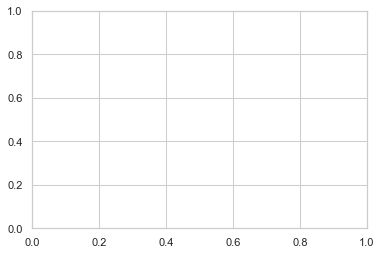

<IPython.core.display.Javascript object>

In [32]:
plt.hist(oh_df["YEAR"], oh_df[["combined_math_linear", "combined_reading_linear"]])
plt.legend(["math", "reading"])
plt.show()

plt.plot(oh_df["YEAR"], oh_df[["combined_math_mean", "combined_reading_mean"]])
plt.legend(["math", "reading"])
plt.show()

plt.plot(oh_df["YEAR"], oh_df[["combined_math_median", "combined_reading_median"]])
plt.legend(["math", "reading"])
plt.show()